In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [169]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [157]:
df.tail(954)


,Day,t
2331,2014-05-23,26
2332,2014-05-24,28
2333,2014-05-25,25
2334,2014-05-26,22
2335,2014-05-27,7
...,...,...
3280,2016-12-27,1
3281,2016-12-28,-3
3282,2016-12-29,0
3283,2016-12-30,3


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором средняя температура была минимальная и самый теплый год. 

In [99]:
# ваш код
max_t = -999999
min_t = 999999
for i in range(2008, 2017):
    s = df[df['Day'].dt.year == i]['t'].sum()
    if int(s) <= min_t:
        cold_year = i
        min_t = int(s)
    if int(s) >= max_t:
        warm_year = i
        max_t = int(s)
    


print(cold_year,' - ',  warm_year)

2012  -  2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [175]:
# ваш код
max_days = 0
for i in range(2008, 2017):
    s = df[(df['Day'].dt.year == i)&(df['Day'].dt.month == 1)&(df['t']>=0)]['t'].sum()
    if int(s) >= max_days:
        max_days = s
        max_year = i
print(max_year)



2008


In [178]:
df[(df['Day'].dt.year == 2010)&(df['Day'].dt.month == 1)]

,Day,t
730,2010-01-01,-14
731,2010-01-02,-13
732,2010-01-03,-19
733,2010-01-04,-6
734,2010-01-05,-6
735,2010-01-06,-6
736,2010-01-07,-9
737,2010-01-08,-10
738,2010-01-09,-13
739,2010-01-10,-13


**3.** В каком году было самое холодное лето (по средней температуре)

In [110]:
# ваш код
min_t = 999999
for i in range(2008, 2017):
    s = df[(df['Day'].dt.year == i) & (df['Day'].dt.month <= 8) & (df['Day'].dt.month >= 6)]['t'].sum()
    if int(s) <= min_t:
        cold_summer = i
        min_t = int(s)
        
print(cold_summer)

2008


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [160]:
# ваш код
max_per = 0
for i in range(df.shape[0]-1):
    s = abs(int(df['t'][i])-int(df['t'][i+1]))
    #print(s)
    if s > max_per:
        max_per = s
        day = df['Day'][i]
day


Timestamp('2014-05-26 00:00:00')

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

<AxesSubplot:>

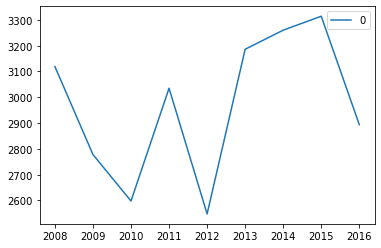

In [162]:
# ваш код
list_t = []
for i in range(2008, 2017):
    s = pd.Series(df[df['Day'].dt.year == i]['t'].sum())
    list_t.append(int(s))
list_year = np.arange(2008,2017)
#print(list_t)
pd.DataFrame(list_t, list_year).plot()